# Lezione 02 - Pipeline Completa per un Progetto ML in Diagnostica Medica
📌 Durata: 4 ore (Teoria: 1h, Pratica: 3h)

📌 Moduli Coperti: Modulo 1

## Obiettivi della Lezione
> Comprendere la pipeline di un progetto ML in diagnostica medica.

> Apprendere tecniche di preprocessing e normalizzazione dei dati.

> Implementare una pipeline ML completa con Scikit-learn.

##  Struttura e Pipeline di un Progetto ML in Diagnostica Medica
Un progetto ML nel settore sanitario segue una sequenza strutturata per garantire l'affidabilità dei risultati.
Le fasi principali sono:

## Fasi di un Progetto ML
1. Raccolta dei Dati
- Fonti: immagini mediche, cartelle cliniche, referti. 
- Considerazioni su privacy e sicurezza (GDPR, HIPAA).

2. Pre-elaborazione dei Dati
- Pulizia dei dati (gestione dei valori mancanti).
- Normalizzazione e scalatura delle feature.
- Data Augmentation per dataset limitati.

3. Modellazione
- Scelta dell’algoritmo ML (Regressione Logistica, Random Forest, CNN).
- Divisione train/test e validazione.

4. Valutazione e Ottimizzazione
- Metriche di performance (Accuracy, Precision, Recall, AUC).
- Hyperparameter tuning con GridSearch o RandomSearch.

5. Deployment e Interpretabilità
- Integrazione del modello in un sistema clinico.
- Explainable AI (Grad-CAM, SHAP).

---

## Parte Pratica (3 ore)
In questa sessione, implementeremo una pipeline ML completa con Scikit-learn per la classificazione di immagini diagnostiche.

📌 Struttura del codice:

1. ✅ Caricamento e pre-processing dati

2. ✅ Pipeline di Machine Learning

3. ✅ Addestramento e valutazione del modello

### Caricamento e Preprocessing dei Dati
Utilizzeremo **Breast Ultrasound Images Database**, un dataset con immagini ecografiche di lesioni benigne/maligne.

Step 1: Importazione delle librerie e caricamento dei dati

Dataset Caricato: 185 training samples, 47 test samples


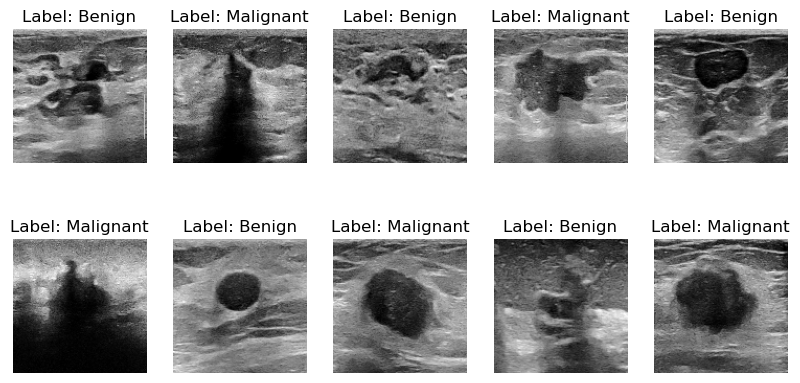

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Percorso del dataset
dataset_path = "D:/bc/"

# Liste per immagini e etichette
images = []
labels = []

# Scansiona tutti i file nella cartella
for filename in os.listdir(dataset_path):
    if "Image" in filename:  # Consideriamo solo immagini (escludendo Mask e Lesion)
        img_path = os.path.join(dataset_path, filename)

        # Lettura immagine in scala di grigi
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (128, 128))  # Ridimensionamento a 128x128
        
        # Determinazione della classe (Benign/Malignant)
        if "Benign" in filename:
            labels.append("Benign")
        elif "Malignant" in filename:
            labels.append("Malignant")
        else:
            continue  # Se non è una classe valida, saltiamo il file
        
        # Aggiunta ai dataset
        images.append(img)

# Conversione in array NumPy
X = np.array(images).reshape(len(images), -1)  # Flattening delle immagini
y = np.array(labels)

# Encoding delle etichette (Benign=0, Malignant=1)
le = LabelEncoder()
y = le.fit_transform(y)

# Divisione Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Dataset Caricato: {len(X_train)} training samples, {len(X_test)} test samples")

# Visualizzazione di alcune immagini di esempio
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis("off")
plt.show()


2.3 Creazione della Pipeline di Machine Learning

> Definiamo una pipeline che include **scalatura, classificazione e valutazione.**

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Creazione della pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Normalizzazione
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=None))  # Modello
])

# Addestramento del modello
pipeline.fit(X_train, y_train)

# Predizione
y_pred = pipeline.predict(X_test)

# Valutazione
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report di Classificazione:\n", classification_report(y_test, y_pred))


Accuracy: 0.723404255319149
Report di Classificazione:
               precision    recall  f1-score   support

           0       0.76      0.59      0.67        22
           1       0.70      0.84      0.76        25

    accuracy                           0.72        47
   macro avg       0.73      0.72      0.72        47
weighted avg       0.73      0.72      0.72        47



2.4 Analisi degli Errori con Matrice di Confusione

> Visualizziamo la matrice di confusione per analizzare gli errori del modello.

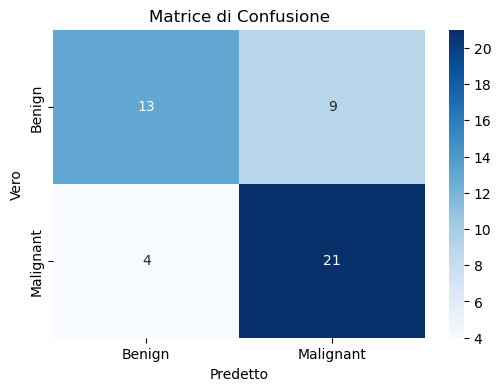

In [11]:
# Matrice di confusione
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predetto")
plt.ylabel("Vero")
plt.title("Matrice di Confusione")
plt.show()


2.5 Ottimizzazione con Grid Search

> Miglioriamo il modello ottimizzando gli iperparametri con GridSearchCV.

In [12]:
from sklearn.model_selection import GridSearchCV

# Definizione degli iperparametri da testare
param_grid = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [None, 10, 20],
}

# Creazione della GridSearch
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Miglior modello trovato
best_model = grid_search.best_estimator_

# Valutazione
y_pred_best = best_model.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Params:", grid_search.best_params_)


Best Model Accuracy: 0.7021276595744681
Best Model Params: {'classifier__max_depth': 20, 'classifier__n_estimators': 100}


Discussione dei Risultati

📌 Accuracy: valutare la percentuale di predizioni corrette.

📌 Confusion Matrix: capire quali classi vengono confuse dal modello.

📌 Grid Search: migliorare la performance con ottimizzazione automatica.

Conclusioni e Prossimi Passi

✅ Abbiamo costruito una pipeline ML completa per l’analisi delle immagini diagnostiche.

✅ Abbiamo migliorato la performance con Grid Search.

✅ Abbiamo interpretato i risultati tramite confusion matrix.

🔜 Prossima Lezione (Lezione 3):

Tecniche avanzate di Preprocessing per Immagini Mediche
Applicazione di Filtri e Augmentazione Dati per Dataset Limitati